# Company Bankruptcy
Company bankruptcy happens when a company can't pay its debts, leading to asset liquidation to repay creditors and possibly halting operations.

## Why Study Past Bankruptcies?

- **Risk Awareness**: Helps investors identify and reduce financial risks.
- **Industry Insight**: Reveals market trends and challenges for better business analysis.
- **Learning Opportunities**: Offers lessons to improve decision-making and avoid mistakes.
- **Regulatory Guidance**: Aids in shaping regulations to protect stakeholders.
- **Strategic Guidance**: Provides struggling companies with strategies for recovery.

## About the dataset

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange (TWSE).

Data collected includes company's bankrupted due to the effects of Dotcom Bubble (late 1990s and early 2000s) and Global Financial crisis (2007 - 2008).

## Analysis Start

In [ ]:
!pip install ppscore
!pip install lazypredict
!pip install scikit-learn

In [ ]:
# Importing Libraries

## Data manipulation
import numpy as np
import pandas as pd

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Sklearn functions
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Imblearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, KMeansSMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# LGBM
from lightgbm import LGBMClassifier
## Predictive power score
import ppscore as pps


## Scipy functions
from scipy.stats import randint

## XGBoost models
from xgboost import XGBClassifier

np.random.seed(1)

In [ ]:
# Defining functions

## Oversampler
def oversample_data(sampler,X,y):
    return(sampler.fit_resample(X, y))

# Calculation of performance metrics
def perf_metrics(y_true, y_pred):

    # Create dictionary to store metrics
    metrics = {
        'accuracy': round(accuracy_score(y_true, y_pred) * 100, 2),
        'balanced_accuracy': round(balanced_accuracy_score(y_true, y_pred) * 100, 2),
        'precision': round(precision_score(y_true, y_pred) * 100, 2),
        'recall': round(recall_score(y_true, y_pred) * 100, 2),
        'f1_score': round(f1_score(y_true, y_pred) * 100, 2),
    }

    return metrics

In [ ]:
df = pd.read_csv("data.csv")
df = df.rename(columns=lambda x: x.strip())

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,...,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,...,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,...,0.77,0.04,0.62,0.60,0.84,0.29,0.03,0.56,1,0.02
3,1,0.40,0.45,0.46,0.58,0.58,1.00,0.80,0.81,0.30,...,0.74,0.00,0.62,0.58,0.83,0.28,0.03,0.56,1,0.02
4,1,0.47,0.54,0.52,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.60,0.84,0.28,0.02,0.58,1,0.04


In [ ]:
# Renaming Bankrupt column
df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace = True)

In [ ]:
# Display dataset dimensions
print("\nDataset Dimensions:")
print(f"Number of Records : {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

# Display data types of features
print("\nFeature Data Types:")
print(df.dtypes.value_counts())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isna().sum()
missing_values_present = missing_values[missing_values > 0]

if missing_values_present.empty:
    print("No missing values identified.")
else:
    print(missing_values_present)

# Check for duplicate records
print("\nDuplicate Records:")
duplicate_count = df.duplicated().sum()

if duplicate_count == 0:
    print("No duplicate records identified.")
else:
    print(f"Number of duplicate records: {duplicate_count}")



Dataset Dimensions:
Number of Records : 6819
Number of Features: 96

Feature Data Types:
float64    93
int64       3
dtype: int64

Missing Values:
No missing values identified.

Duplicate Records:
No duplicate records identified.


### 🎢Correlation study

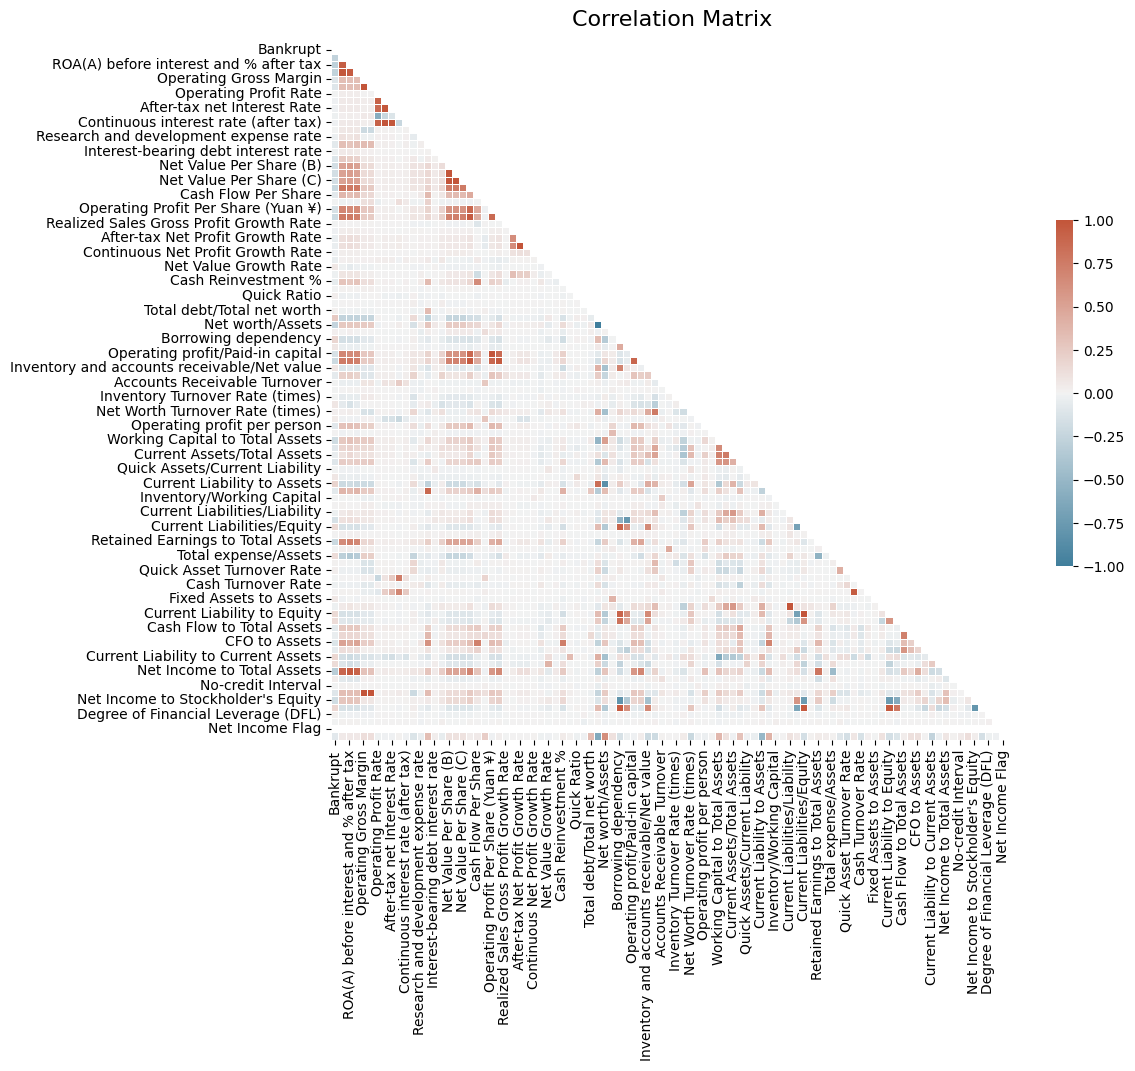

In [ ]:
corr_matrix = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
# Add a title
ax.set_title("Correlation Matrix", fontsize=16, pad=15)
# Show the plot
plt.show()

Distribution of categorical columns

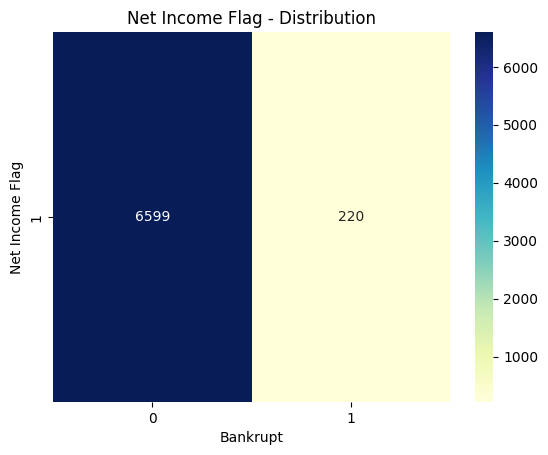

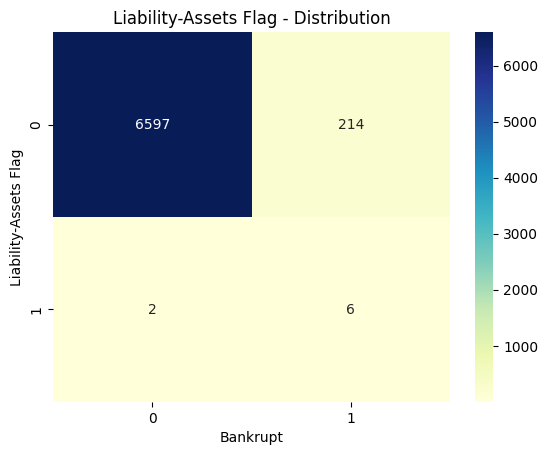

In [ ]:
sns.heatmap(pd.crosstab(df['Net Income Flag'],df["Bankrupt"]), annot=True, cmap="YlGnBu",fmt=".0f")
plt.title("Net Income Flag - Distribution")
plt.show()

sns.heatmap(pd.crosstab(df['Liability-Assets Flag'],df["Bankrupt"]), annot=True, cmap="YlGnBu",fmt=".0f")
plt.title("Liability-Assets Flag - Distribution")
plt.show()

In [ ]:
# Droping Net income flag column
df.drop(['Net Income Flag'],axis = 1,inplace=True)

## Curse of dimensionality

In [ ]:
# Train and Test split
X = df.drop(['Bankrupt'],axis=1)
y = df.Bankrupt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=76)

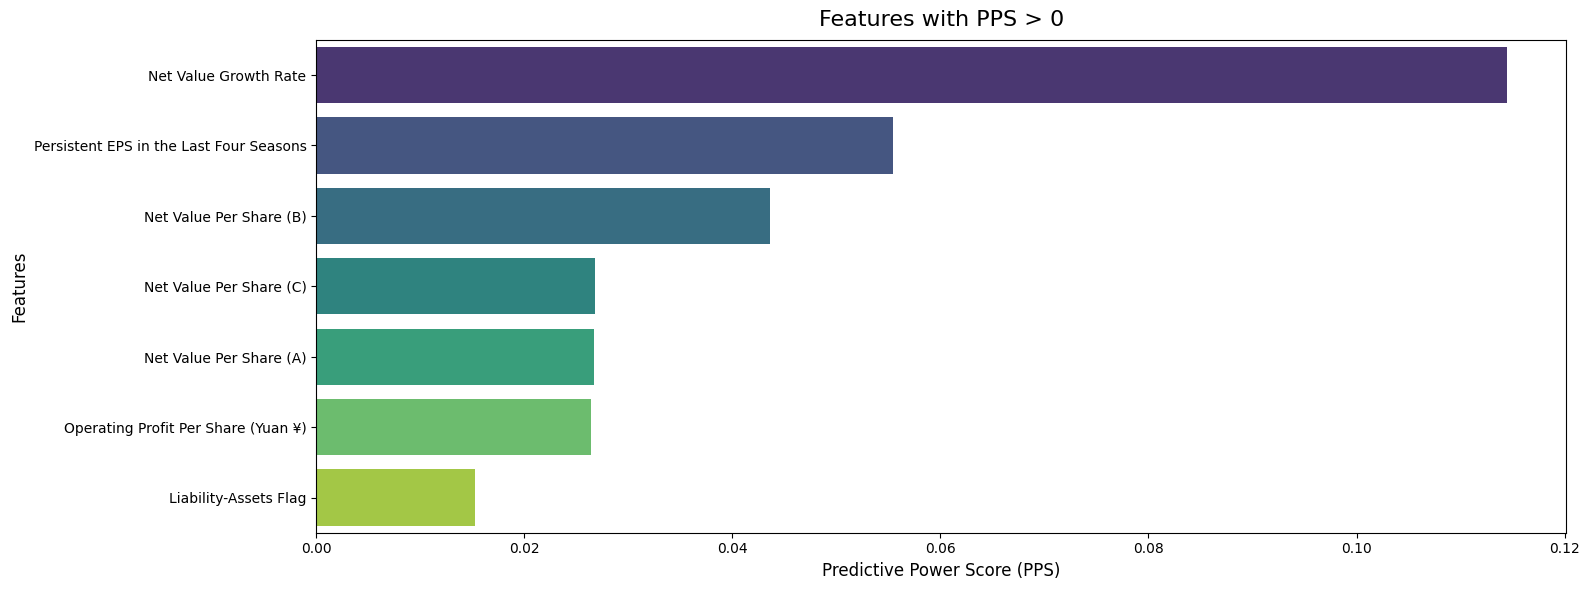

In [ ]:
# Calculate Predictive Power Score (PPS)
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = y_train.astype(str).copy()

# Generate PPS for predictors
pps_df = pps.predictors(pps_input_df, y="Bankrupt")

# Filter PPS to include only relevant scores
pps_filtered_df = pps_df[pps_df.ppscore > 0]

# Plot PPS scores
plt.figure(figsize=(16, 6))
sns.barplot(data=pps_filtered_df, x="ppscore", y="x", palette="viridis")
plt.ylabel("Features", fontsize=12)
plt.xlabel("Predictive Power Score (PPS)", fontsize=12)
plt.title("Features with PPS > 0", fontsize=16, pad=10)
plt.tight_layout()
plt.show()

In [ ]:
pps_df.sort_values(by=['ppscore'], ascending=False)[:10]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Net Value Growth Rate,Bankrupt,0.11,classification,True,weighted F1,0.95,0.96,DecisionTreeClassifier()
1,Persistent EPS in the Last Four Seasons,Bankrupt,0.06,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
2,Net Value Per Share (B),Bankrupt,0.04,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
3,Net Value Per Share (C),Bankrupt,0.03,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
4,Net Value Per Share (A),Bankrupt,0.03,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
5,Operating Profit Per Share (Yuan ¥),Bankrupt,0.03,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
6,Liability-Assets Flag,Bankrupt,0.02,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
61,Operating Funds to Liability,Bankrupt,0.00,classification,True,weighted F1,0.95,0.94,DecisionTreeClassifier()
69,Total income/Total expense,Bankrupt,0.00,classification,True,weighted F1,0.95,0.95,DecisionTreeClassifier()
68,Retained Earnings to Total Assets,Bankrupt,0.00,classification,True,weighted F1,0.95,0.94,DecisionTreeClassifier()


In [ ]:
selected_features_final = pps_filtered_df.x.tolist()

In [ ]:
selected_features_final

['Net Value Growth Rate',
 'Persistent EPS in the Last Four Seasons',
 'Net Value Per Share (B)',
 'Net Value Per Share (C)',
 'Net Value Per Share (A)',
 'Operating Profit Per Share (Yuan ¥)',
 'Liability-Assets Flag']

In [ ]:
# Get top n features
## Lets select top n features based on feature importance
top_n_req = 10

In [ ]:
# Define hyperparameters and their possible values for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=76)

# Set up RandomizedSearchCV for hyperparameter tuning with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    random_state=76,
    scoring='f1',
    cv=5
)

# Fit the model to training data
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters from Randomized Search:")
print(random_search.best_params_)

print("\nBest Cross-Validation F1 Score:")
print(f"F1 Score: {round(random_search.best_score_, 2)}")

Best Parameters from Randomized Search:
{'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}

Best Cross-Validation F1 Score:
F1 Score: 0.33


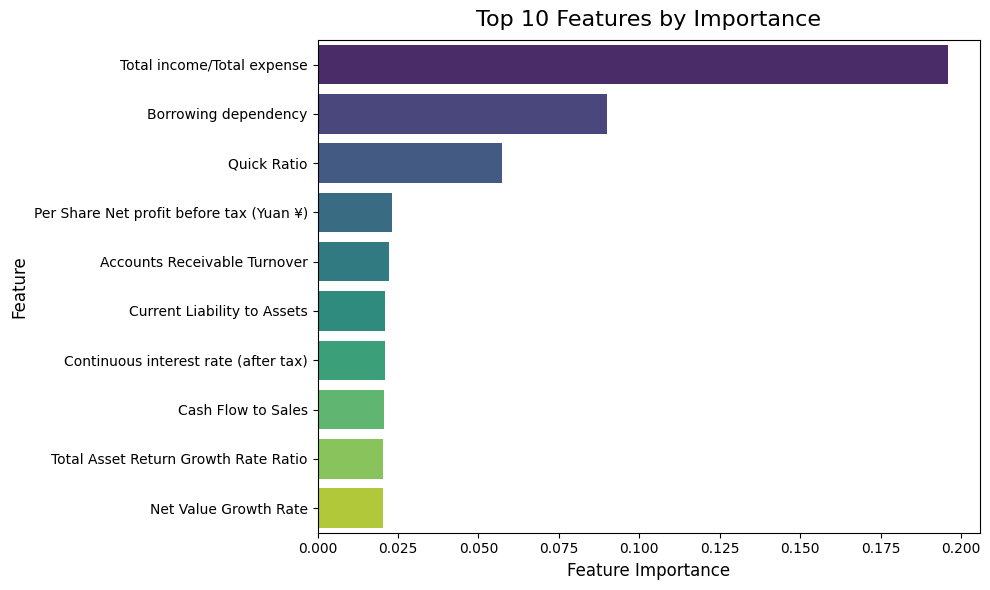

In [ ]:
# Get the best decision tree model from RandomizedSearchCV
best_dt_classifier = random_search.best_estimator_

# Extract feature importances and feature names
feature_importances = best_dt_classifier.feature_importances_
feature_names = best_dt_classifier.feature_names_in_

# Get the indices of the top n features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in reversed(top_n_indices)],  # Reverse for descending order
    'Importance': feature_importances[top_n_indices][::-1]  # Reverse for descending order
})

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title(f"Top {top_n_req} Features by Importance", fontsize=16, pad=10)
plt.tight_layout()
plt.show()

**Conclusion**
From the Top 10 Features by Importance plot:

Only 3 features exhibit significantly high importance scores compared to the rest. The remaining features contribute minimally to the decision-making process of the model.

**Decision:**
To simplify the model and enhance interpretability, we will retain only these top 3 features for the final feature set.

In [ ]:
# Select only the top features based on feature importance
top_features = feature_importance_df.Feature.head(3).to_list()
# Add the top features to the final selected features list
selected_features_final = list(set(selected_features_final + top_features))

# Sort the final feature list
selected_features_final.sort()

# Display the final selected features
print("Final selected features:", selected_features_final)
print("\nNumber of features selected:")
print(len((selected_features_final)))

Final selected features: ['Borrowing dependency', 'Liability-Assets Flag', 'Net Value Growth Rate', 'Net Value Per Share (A)', 'Net Value Per Share (B)', 'Net Value Per Share (C)', 'Operating Profit Per Share (Yuan ¥)', 'Persistent EPS in the Last Four Seasons', 'Quick Ratio', 'Total income/Total expense']

Number of features selected:
10


In [ ]:
# Removing Train and Test variables
del(X_train, X_test, y_train, y_test)

# Data Analysis

In [ ]:
df[selected_features_final].describe()

,Borrowing dependency,Liability-Assets Flag,Net Value Growth Rate,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Operating Profit Per Share (Yuan ¥),Persistent EPS in the Last Four Seasons,Quick Ratio,Total income/Total expense
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.37,0.00,1566212.06,0.19,0.19,0.19,0.11,0.23,8376594.82,0.00
std,0.02,0.03,114159389.52,0.03,0.03,0.03,0.03,0.03,244684748.45,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.37,0.00,0.00,0.17,0.17,0.17,0.10,0.21,0.00,0.00
50%,0.37,0.00,0.00,0.18,0.18,0.18,0.10,0.22,0.01,0.00
75%,0.38,0.00,0.00,0.20,0.20,0.20,0.12,0.24,0.01,0.00
max,1.00,1.00,9330000000.00,1.00,1.00,1.00,1.00,1.00,9230000000.00,1.00


In [ ]:
# Identify infinite and NaN values in the DataFrame
number_inf = pd.DataFrame(df.isin([np.inf, -np.inf]) | df.isna()).sum(axis=0).reset_index()

# Rename columns for clarity
number_inf.columns = ["Feature", "Count"]

# Filter out rows where Count is 0
number_inf = number_inf[number_inf["Count"] > 0]

# Check if there are any features with Inf or NaN values
if number_inf.empty:
    print("No Inf or NaN values present.")
else:
    print(number_inf)

No Inf or NaN values present.


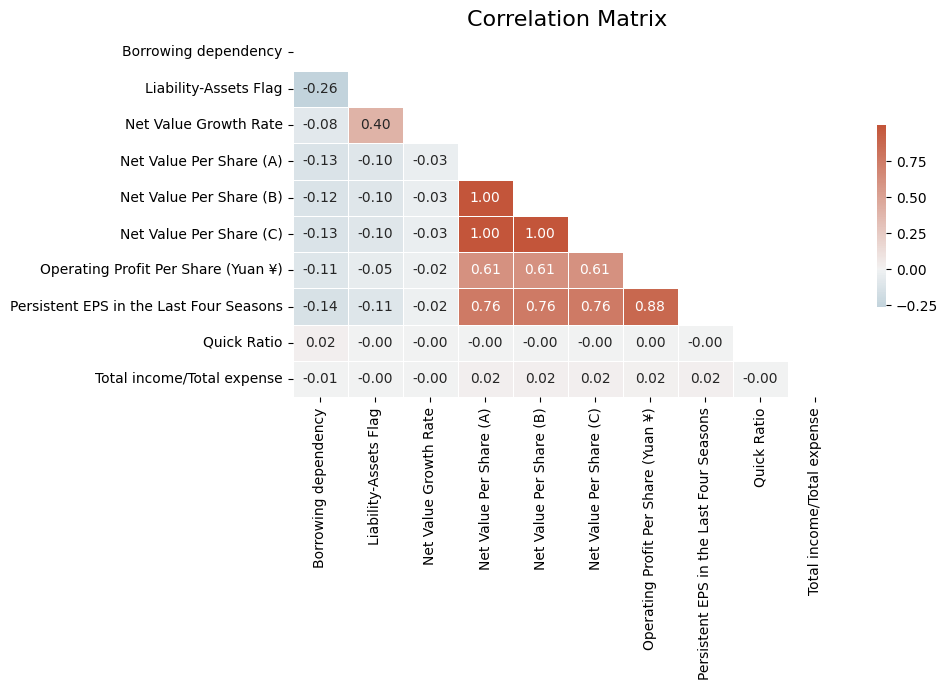

In [ ]:
#Correlation
# Compute the correlation matrix for the selected features
corr_matrix = df[selected_features_final].corr()

# Generate a mask for the upper triangle of the matrix (to avoid redundant values)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask to remove the upper triangle
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    center=0,
    annot=True,  # Annotate with correlation values
    fmt=".2f",  # Format annotations to 2 decimal places
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

# Add a title and show the plot
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()  # Ensure everything fits without clipping
plt.show()

d

In [ ]:
df[selected_features_final]

,Borrowing dependency,Liability-Assets Flag,Net Value Growth Rate,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Operating Profit Per Share (Yuan ¥),Persistent EPS in the Last Four Seasons,Quick Ratio,Total income/Total expense
0,0.39,0,0.00,0.15,0.15,0.15,0.10,0.17,0.00,0.00
1,0.38,0,0.00,0.18,0.18,0.18,0.09,0.21,0.00,0.00
2,0.38,0,0.00,0.18,0.18,0.19,0.09,0.18,0.01,0.00
3,0.38,0,0.00,0.15,0.15,0.15,0.08,0.19,0.00,0.00
4,0.38,0,0.00,0.17,0.17,0.17,0.10,0.21,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
6814,0.37,0,0.00,0.18,0.18,0.18,0.10,0.22,0.01,0.00
6815,0.37,0,0.00,0.18,0.18,0.18,0.10,0.22,0.01,0.00
6816,0.37,0,0.00,0.27,0.27,0.27,0.10,0.21,0.04,0.00
6817,0.37,0,0.00,0.21,0.21,0.21,0.11,0.23,0.01,0.00


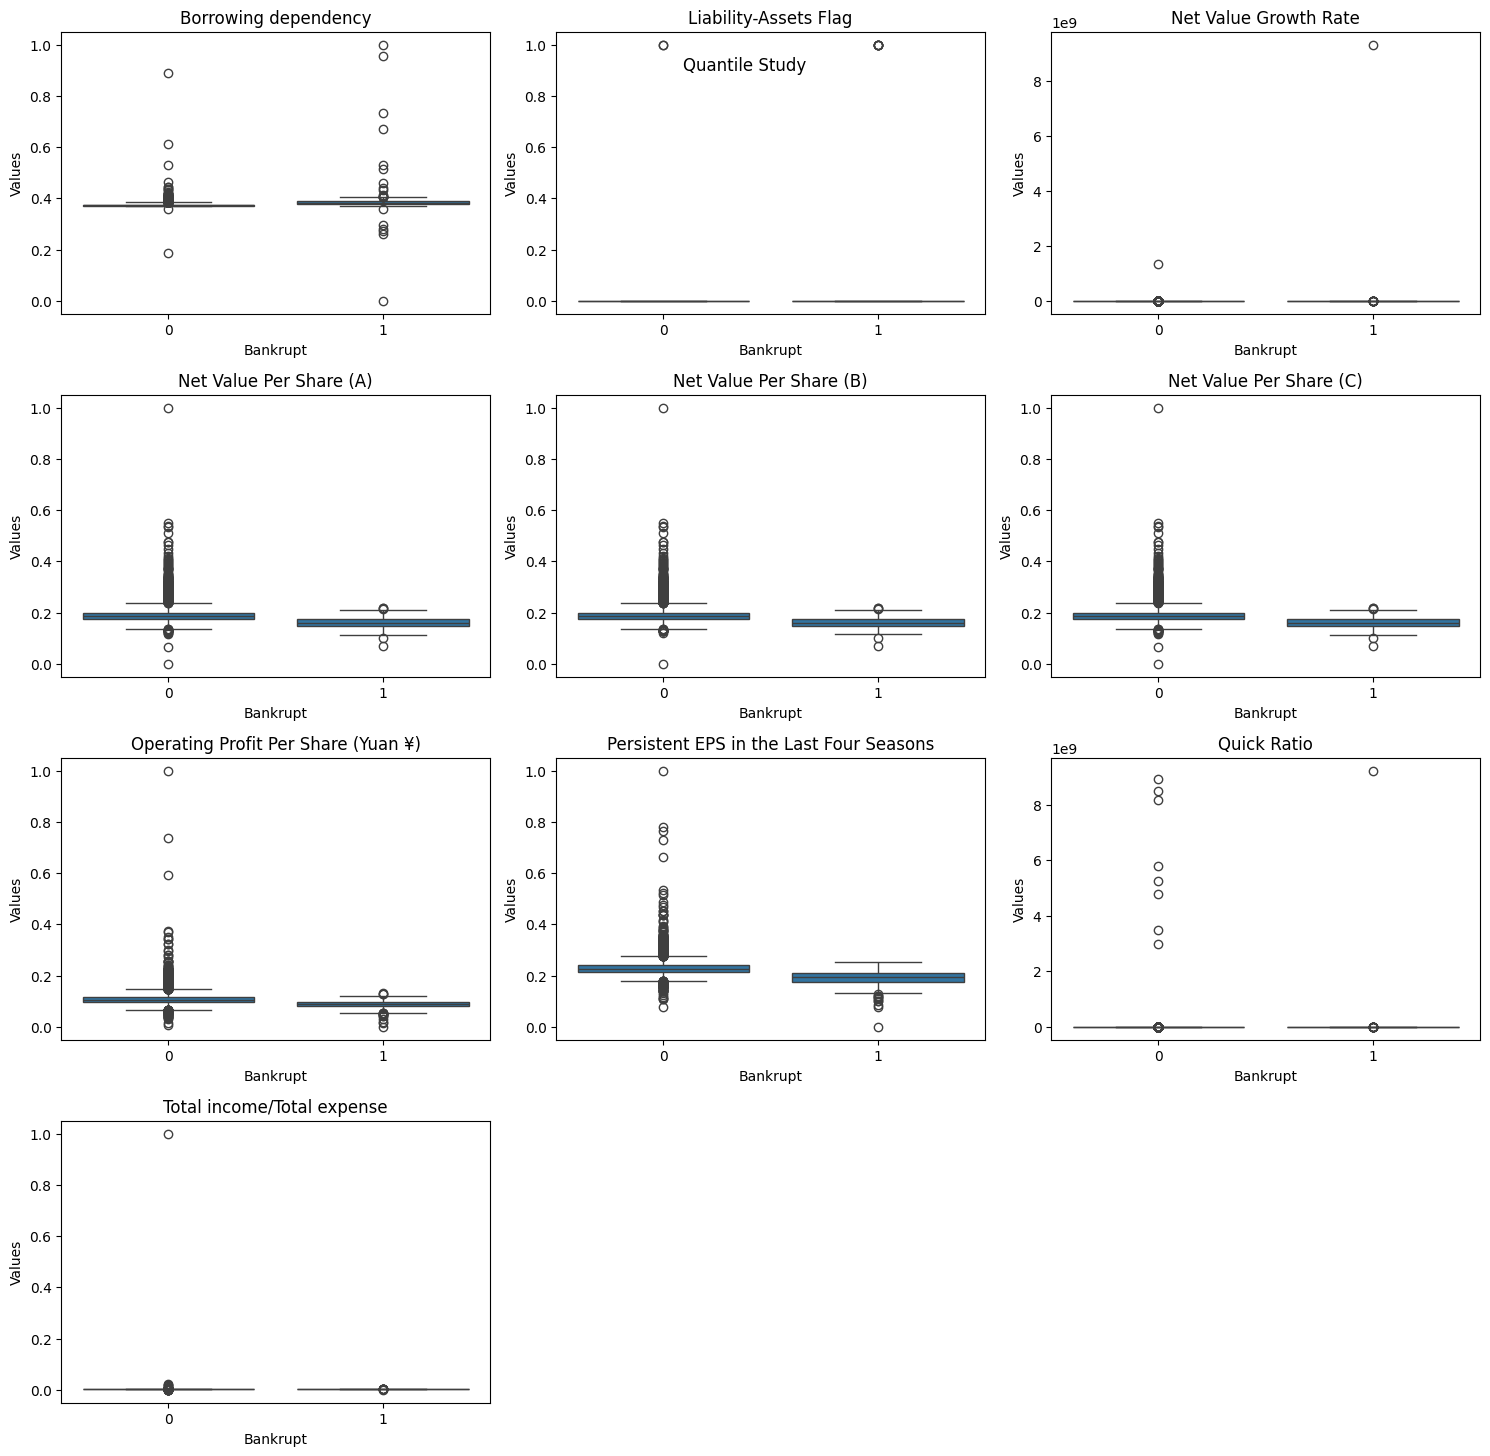

In [ ]:
features_to_plot = selected_features_final.copy()
features_to_plot

# Create a new figure
fig = plt.figure(figsize=(15, 25))

# Iterate through each column in the given list
for i, col in enumerate(features_to_plot, start=1):
    plt.subplot(7,3, i)

    # Plot the boxplot for the current column using Seaborn
    sns.boxplot(data = df ,y=col, x= "Bankrupt" ,orient='v')

    # Set labels and title
    plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Bankrupt')

plt.tight_layout()
fig.subplots_adjust(top=0.99)
fig.suptitle("Quantile Study")
plt.show()

Observations :

We can notice that there are outliers (i.e Beyond Upper Whisker and Lower Whisker), will try to remove outliers post data analysis step

### Target variable analysis 🎯

In [ ]:
# Converting Bankrupt column to Categorical
df['Bankrupt'] = df['Bankrupt'].astype(str)

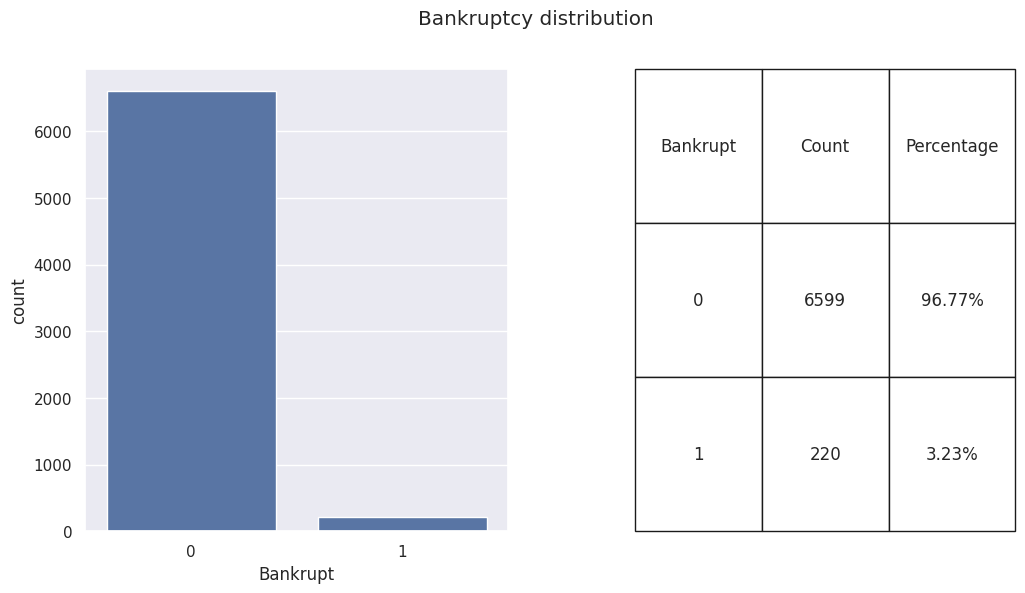

In [ ]:
# Calculate counts and percentages
count_df = df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution')
plt.show()

### ⚖️ Data imbalance problem

In the plot above, we see that **Bankrupt companies** make up only **3.23% of the entire dataset**. When we split the data into training and testing sets, there will be very few samples of the "1" class (bankrupt companies) in the training set.

In real-world cases, it's common to deal with imbalanced datasets, but why is this a big issue?

Imbalanced datasets cause problems like:

- Favoring the majority class (non-bankrupt companies)
- Poor generalization to new data
- Overestimating accuracy
- Difficulty in detecting rare events (like bankrupt companies)
- Limited learning from the minority class (bankrupt companies)
- Misleading feature importance

We can fix this by oversampling or undersampling the data using different methods like **SMOTE, ADASYN, Tomek Links, Edited Nearest Neighbors**,...

**We will only use oversampling/undersampling on the training data to prevent adding any synthetic data when evaluating the models**

Decision Flow

1. Split the data into training and testing sets.
2. Set a sampling ratio between 0 and 1, increasing by 0.1 at each step. For each step:
   - Select different sampling methods: Random Oversampler, SMOTE, ADASYN, SMOTEENN, SMOTETomek.
   - Apply each algorithm to oversample the training data.
   - Train a Decision Tree model and check its performance on the test data.
3. Choose the sampling method that gives the best overall results.


# 🥼 Experimentation on Oversamplers/Hybrid Samplers

### 1. Random Oversampler
- **Definition**: Object to over-sample the minority class(es) by picking samples at random with replacement. No synthetic samples are generated from this algorithm.

### 2. SMOTE
- **Definition**: It generates synthetic minority instances by interpolating between existing minority samples, improving model performance and reducing misclassification of the minority class.
- **Issue**: Outlier points in minority samples might lead to unrealistic synthetic samples that don't represent the original data well.

### 3. Borderline SMOTE
- **Definition**: This algorithm starts by classifying the minority class observations.
    - Any minority observation is considered noise if all its neighbors belong to the majority class, and these observations are ignored while creating synthetic data (similar to DBSCAN).
    - Points with both majority and minority neighbors are classified as border points, and resampling is done from these points (these are the extreme observations that support vectors focus on).
- **Issue**: It may overemphasize extreme observations.

### 4. ADASYN
- **Definition**: ADASYN is a framework that evaluates the impurity of each minority observation's neighborhood by considering the ratio of majority to total observations in the neighborhood ('k').
    - The impurity ratio is transformed into a probability distribution to generate more synthetic points for higher-impurity observations.
- **Issues**:
    - If minority examples are sparsely distributed, neighborhoods may contain only one minority instance, and increasing the neighborhood size can help.
    - ADASYN’s adaptability might affect precision by generating more data in neighborhoods with a high presence of the majority class.

### 5. SMOTE-ENN
- **Definition**: SMOTE generates synthetic samples, while ENN undersamples noisy data points.
    - **ENN**: Removes instances misclassified by their nearest neighbors (assumed to be mislabeled or noisy).
- **Issues**:
    - It may remove useful information if majority-class instances are not truly misclassified.
    - Assumes that KNN is an accurate estimator of class membership.

### 6. SMOTE-Tomek Links
- **Definition**: SMOTE generates synthetic samples, and Tomek Links are used to undersample data points with "links."
    - **Tomek’s Link**: Exists when two samples from different classes are closest neighbors to each other.
- **Issues**:
    - **Underfitting**: Removing too many majority instances may cause underfitting.
    - **Loss of useful information**: Important data may be deleted, which can affect class boundaries.
    - **Ambiguity at class boundaries**: Removing points near class boundaries doesn’t always improve performance.

---

### References:
- [Towards Data Science: Class Imbalance - SMOTE, Borderline SMOTE, ADASYN](https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804)
- [Medium: How to Handle Imbalanced Data - Oversampling Techniques](https://indraneeldb1993ds.medium.com/how-to-handle-imbalanced-data-oversampling-techniques-a5671c6dfb60#:~:text=to%20Borderline%20SMOTE.-,Cons%3A,a%20substantial%20majority%2Dclass%20presence.)
- [Imbalanced-Learn: Under-Sampling with Tomek Links](https://imbalanced-learn.org/stable/under_sampling.html#tomek-links)


In [ ]:
# Separate features and target variable
X = df[selected_features_final].copy()
y = df['Bankrupt'].copy()

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True, stratify=y, random_state=76)

print("Target variable distribution in Train samples :")
pd.DataFrame(y_train.value_counts())

Target variable distribution in Train samples :


,Bankrupt
0,4619
1,154


### Oversampling - Train data 🔰

In [ ]:
scaler_obj = RobustScaler()
scaler_obj.fit(X_train)
X_train = scaler_obj.transform(X_train)

#### Creating a baseline decision tree model 🌴

Baseline model will be used to compare the performance of the oversampling algorithms.

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=76)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(scaler_obj.transform(X_test))

print("Performance of Decision tree with the original data (Without Synthetic train samples)")
baseline_perf = pd.DataFrame.from_dict([perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))])
baseline_perf

Performance of Decision tree with the original data (Without Synthetic train samples)


,accuracy,balanced_accuracy,precision,recall,f1_score
0,95.11,65.25,28.21,33.33,30.56


In [ ]:
# Define sampling ratios and prepare the decision tree model
sampling_ratios = np.arange(0.05, 0.5, 0.05)
dt_model = DecisionTreeClassifier(random_state=76)
performance_results = pd.DataFrame(columns=['sampling_ratio', 'sampling_algorithm', 'accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1_score'])

# Define oversampling methods
sampling_methods = [
    RandomOverSampler(random_state=76),
    SMOTE(random_state=76),
    ADASYN(random_state=76),
    SMOTEENN(random_state=76),
    SMOTETomek(random_state=76),
    BorderlineSMOTE(random_state=76)
]

# Oversampling method names
method_names = [
    "Random oversampling",
    "SMOTE",
    "ADASYN",
    "SMOTEENN",
    "SMOTE Tomek",
    "Borderline SMOTE"
]

# Iterate over each sampling ratio
for ratio in sampling_ratios:

    # Create oversampling objects for the current ratio
    oversampled_sets = [
        sampler.set_params(sampling_strategy=ratio) for sampler in sampling_methods
    ]

    # Apply oversampling to the training data
    oversampled_data = [
        sampler.fit_resample(X_train, y_train) for sampler in oversampled_sets
    ]

    # Extract features and labels for each oversampled set
    X_oversampled_sets = [data[0] for data in oversampled_data]
    y_oversampled_sets = [data[1] for data in oversampled_data]

    # Iterate through each oversampled dataset and corresponding method
    for X_train_oversampled, y_train_oversampled, method in zip(X_oversampled_sets, y_oversampled_sets, method_names):

        # Train the classifier on the oversampled data
        dt_model.fit(X_train_oversampled, y_train_oversampled)

        # Make predictions
        y_pred = dt_model.predict(scaler_obj.transform(X_test))

        # Calculate performance metrics
        performance_metrics = perf_metrics(np.array(y_test.astype(int)), np.array(y_pred.astype(int)))
        performance_metrics['sampling_ratio'] = ratio
        performance_metrics['sampling_algorithm'] = method

        # Append results to the performance DataFrame
        performance_results = pd.concat([performance_results, pd.DataFrame([performance_metrics])], ignore_index=True)


### Analysing Oversampling results 🔍

In [ ]:
print("Baseline model results : ")
display(baseline_perf)

Baseline model results : 


,accuracy,balanced_accuracy,precision,recall,f1_score
0,95.11,65.25,28.21,33.33,30.56


In [ ]:
print("Top SMOTED model results by precision : ")
display(performance_results.sort_values(by=['precision'], ascending=False).head(5))
print("Top SMOTED model results by recall : ")
display(performance_results.sort_values(by=['recall'], ascending=False).head(5))
print("Top SMOTED model results by f1 score : ")
display(performance_results.sort_values(by=['f1_score','recall','precision'], ascending=False).head(5))

Top SMOTED model results by precision : 


,sampling_ratio,sampling_algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
3,0.05,SMOTEENN,96.73,69.02,49.06,39.39,43.70
41,0.35,Borderline SMOTE,95.55,72.07,35.63,46.97,40.52
42,0.40,Random oversampling,95.80,66.34,34.85,34.85,34.85
4,0.05,SMOTE Tomek,95.75,66.31,34.33,34.85,34.59
1,0.05,SMOTE,95.65,67.73,34.25,37.88,35.97


Top SMOTED model results by recall : 


,sampling_ratio,sampling_algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
51,0.45,SMOTEENN,91.94,78.26,22.95,63.64,33.73
21,0.20,SMOTEENN,93.60,79.12,28.19,63.64,39.07
45,0.40,SMOTEENN,91.30,77.93,21.43,63.64,32.06
39,0.35,SMOTEENN,92.57,77.85,24.40,62.12,35.04
33,0.30,SMOTEENN,92.96,78.06,25.62,62.12,36.28


Top SMOTED model results by f1 score : 


,sampling_ratio,sampling_algorithm,accuracy,balanced_accuracy,precision,recall,f1_score
3,0.05,SMOTEENN,96.73,69.02,49.06,39.39,43.70
41,0.35,Borderline SMOTE,95.55,72.07,35.63,46.97,40.52
15,0.15,SMOTEENN,94.23,77.98,30.30,60.61,40.40
21,0.20,SMOTEENN,93.60,79.12,28.19,63.64,39.07
35,0.30,Borderline SMOTE,95.21,71.16,32.61,45.45,37.97


### Observations:
- **SMOTE ENN** performs the best in terms of accuracy, recall and f1.


### Get Oversampled - X Train and y Train

In [ ]:
# Set the final sampling ratio for oversampling
sampling_ratio_final = 0.45

# Initialize the SMOTEENN oversampler with the final sampling ratio
oversampler_final = SMOTEENN(sampling_strategy=sampling_ratio_final, random_state=76)

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversample_data(oversampler_final, X_train, y_train)

# Convert the oversampled data into a DataFrame for easier handling
train_os_df = pd.DataFrame(X_train_oversampled, columns=selected_features_final)

# Add the target variable 'Bankrupt' to the DataFrame
train_os_df['Bankrupt'] = y_train_oversampled

# Clean up unnecessary variables from memory
del X_train_oversampled, y_train_oversampled


### Data Analysis II - After Over Sampling

In this section, main focus will be on analysing the Train data after SMOTEENN

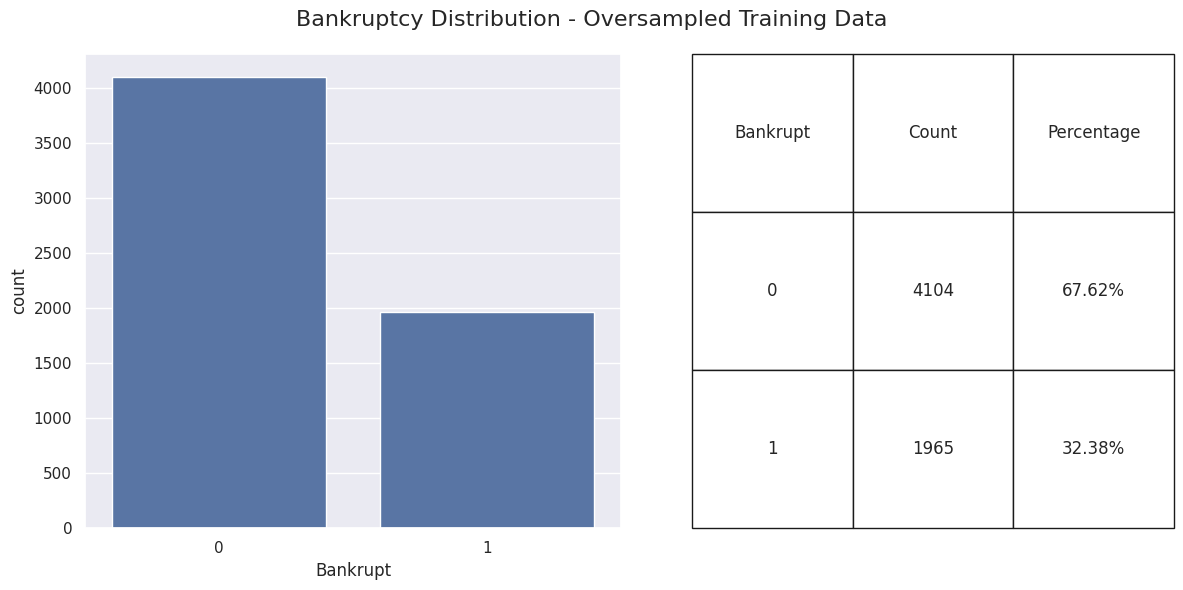

In [ ]:
# Calculate counts and percentages of Bankrupt column
count_df = train_os_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(train_os_df)) * 100
count_df['Percentage'] = count_df['Percentage'].round(2).astype(str) + "%"

# Set the visual style for the plot
sns.set(style="darkgrid")

# Create the figure for the countplot and table
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
sns.countplot(x='Bankrupt', data=train_os_df, order=["0", "1"])

# Create a table with counts and percentages
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Hide axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
               bbox=[0.1, 0, 0.9, 1])  # Adjust table position

# Set the title for the entire figure
plt.suptitle('Bankruptcy Distribution - Oversampled Training Data', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

### Outliers Analysis

Lets think from Bankruptcy perspective 🏦
In our base dataset, only 3.23% companies are bankrupt (i.e 6599 Stable companies vs 220 Bankrupt companies).

Bankruptcy is a event occurs at a very small numbers in a normal economic condition in a stable economies. Thus Bankruptcy event is very rare, in technical terms we can say this event as outlier event.

In this context, if we remove outliers - There is a high chance that we might lose a valuable information. So we will not remove outliers.

### 🧪Oversampling test data

Before building our different types of ML models, lets take a quick look at test data's target value distribution.

Because of data imbalance in the overall dataset, it is good to ensure enough number of samples to validate our model. In such cases, we will apply oversampling algorithm to test data.

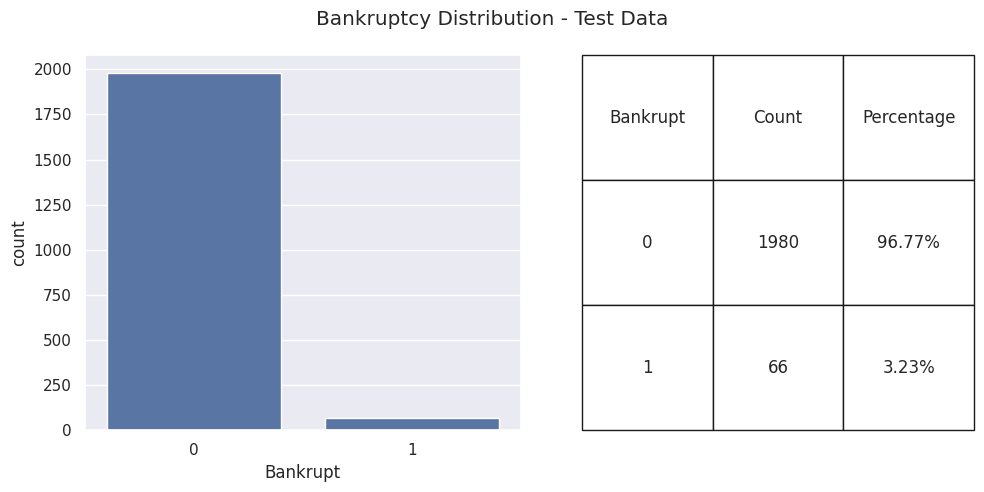

In [ ]:
# Calculate counts and percentages for the 'Bankrupt' column in the test data
count_df = y_test.value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(y_test)) * 100
count_df['Percentage'] = count_df['Percentage'].round(2).astype(str) + "%"

# Set the visual style for the plot
sns.set(style="darkgrid")

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Plot the countplot for 'Bankrupt' in the test data
plt.subplot(1, 2, 1)
sns.countplot(x='Bankrupt', data=pd.DataFrame(y_test), order=["0", "1"])

# Create a table with counts and percentages
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
               bbox=[0.1, 0, 0.9, 1])  # Adjust table's position within the subplot

# Set the title for the figure
plt.suptitle('Bankruptcy Distribution - Test Data')

# Show the plot
plt.tight_layout()
plt.show()

We will apply same oversampling algorithm and parameters to generate more test samples. Same algorithm and parameters are used as train data, assuming train and test samples are representative.

In [ ]:
# Perform oversampling on the test data using the provided oversampler
X_test_os, y_test_os = oversample_data(oversampler_final, scaler_obj.transform(X_test), y_test)

# Create a DataFrame for the oversampled test data
test_os_df = pd.DataFrame(X_test_os, columns=X_test.columns)
test_os_df['Bankrupt'] = y_test_os

# Clean up the oversampled test data variables
del X_test_os, y_test_os


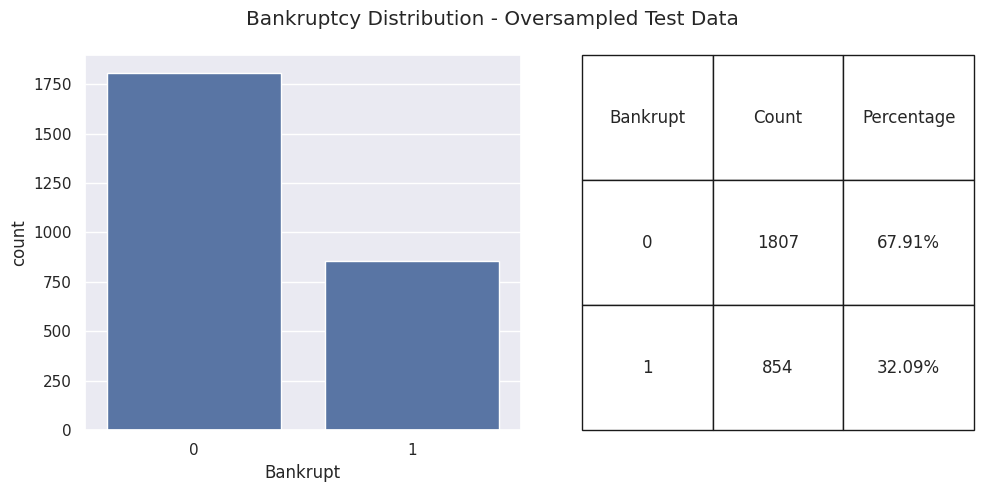

In [ ]:
# Calculate counts and percentages for the 'Bankrupt' column in the oversampled test data
count_df = test_os_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(test_os_df)) * 100
count_df['Percentage'] = count_df['Percentage'].round(2).astype(str) + "%"

# Set visual style for the plot
sns.set(style="darkgrid")

# Create a figure with two subplots for the countplot and the table
plt.figure(figsize=(10, 5))

# Plot the countplot for 'Bankrupt' in the oversampled test data
plt.subplot(1, 2, 1)
sns.countplot(x='Bankrupt', data=test_os_df, order=["0", "1"])

# Create a table with counts and percentages
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
               bbox=[0.1, 0, 0.9, 1])  # Adjust the table's position

# Set the title for the figure
plt.suptitle('Bankruptcy Distribution - Oversampled Test Data')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("Features used to build a model : ",selected_features_final)

Features used to build a model :  ['Borrowing dependency', 'Liability-Assets Flag', 'Net Value Growth Rate', 'Net Value Per Share (A)', 'Net Value Per Share (B)', 'Net Value Per Share (C)', 'Operating Profit Per Share (Yuan ¥)', 'Persistent EPS in the Last Four Seasons', 'Quick Ratio', 'Total income/Total expense']


### Select the model
We have selected the following three models for further analysis based on their proven performance, efficiency, and ability to handle complex datasets:

#### 1. **LGBM Classifier**
   - **Speed and Efficiency**: LGBM is highly efficient, especially with large datasets, making it ideal for time-sensitive applications.
   - **Scalability**: It can handle large-scale data with lower memory usage and faster training times compared to other models.
   - **High Performance**: LGBM frequently outperforms other models in terms of accuracy and speed for structured/tabular data.

#### 2. **Random Forest**
   - **Robustness**: This ensemble model reduces overfitting by averaging the predictions of multiple decision trees, offering reliable performance.
   - **Versatility**: It works well with both regression and classification tasks and handles both numerical and categorical data without requiring feature scaling.
   - **Feature Importance**: Random Forest provides insights into feature importance, helping to understand the model’s decision-making process.

#### 3. **XGBoost**
   - **Accuracy**: XGBoost is known for its high accuracy, making it a favorite in machine learning competitions.
   - **Regularization**: It includes L1 and L2 regularization to prevent overfitting and enhance model generalization.
   - **Handling Missing Data**: XGBoost can effectively manage missing values, ensuring robustness in real-world datasets.
   - **Speed and Scalability**: XGBoost is optimized for high performance and can be scaled across multiple CPUs and distributed systems, making it efficient for large datasets.

---

### Conclusion:
These three models—**LGBM Classifier**, **Random Forest**, and **XGBoost**—were chosen for their exceptional performance in both predictive accuracy and computational efficienc


In [ ]:
X_train_os = train_os_df[selected_features_final]
y_train_os = train_os_df.Bankrupt.astype(int)

In [ ]:
X_test_final = pd.DataFrame(test_os_df[selected_features_final],columns=selected_features_final)
y_test_final = test_os_df.Bankrupt.astype(int)

### LGBM Classifier

In [ ]:
# Instantiate the LGBMClassifier model
lgbm_classifier = LGBMClassifier(random_state=76)

# Fit the model on the oversampled training data
lgbm_classifier.fit(X_train_os, y_train_os)

# Predict the outcomes on the final test dataset
lgbm_predictions = lgbm_classifier.predict(X_test_final)

# Calculate the accuracy of the model
model_accuracy = accuracy_score(y_test_final, lgbm_predictions)

# Display the result
print(f"LGBMClassifier Accuracy: {model_accuracy}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1965, number of negative: 4104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 6069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323777 -> initscore=-0.736470
[LightGBM] [Info] Start training from score -0.736470
LGBMClassifier Accuracy: 0.9041713641488163


In [ ]:
# Predict
y_pred = lgbm_classifier.predict_proba(X_test_final)

# Saving prediction in a dataframe
y_test_pred_prob_lgbm = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
final_prediction_threshold = 0.5
y_test_pred_prob_lgbm["Prediction"] = y_test_pred_prob_lgbm["1"] > final_prediction_threshold
y_test_pred_prob_lgbm["Prediction"] = y_test_pred_prob_lgbm["Prediction"].astype(int)
y_test_pred_prob_lgbm["True_Class"] = y_test_final

In [ ]:
print(classification_report(y_true = y_test_pred_prob_lgbm.True_Class, y_pred = y_test_pred_prob_lgbm.Prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1807
           1       0.93      0.76      0.84       854

    accuracy                           0.90      2661
   macro avg       0.91      0.87      0.88      2661
weighted avg       0.91      0.90      0.90      2661



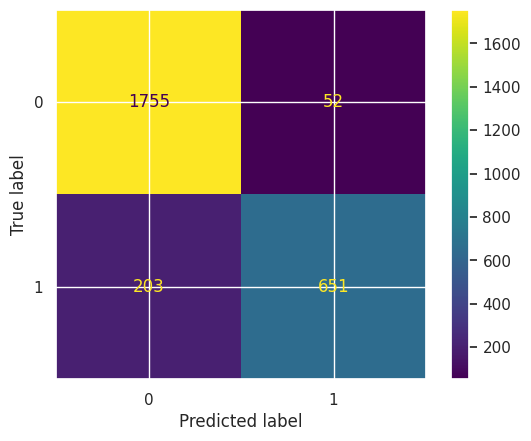

In [ ]:
cm = confusion_matrix(y_test_pred_prob_lgbm.True_Class, y_test_pred_prob_lgbm.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Forest

In [ ]:
# Instantiate the RandomForestClassifier model
random_forest = RandomForestClassifier(random_state=76)

# Fit the model on the oversampled training data
random_forest.fit(X_train_os, y_train_os)

# Generate predictions on the test data
rf_predictions = random_forest.predict(X_test_final)

In [ ]:
# Predict
y_pred = random_forest.predict_proba(X_test_final)

# Saving prediction in a dataframe
y_test_pred_prob_rf = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
prediction_threshold = 0.5
y_test_pred_prob_rf["Prediction"] = y_test_pred_prob_rf["1"] > prediction_threshold
y_test_pred_prob_rf["Prediction"] = y_test_pred_prob_rf["Prediction"].astype(int)
y_test_pred_prob_rf["True_Class"] = y_test_final

In [ ]:
print(classification_report(y_true = y_test_pred_prob_rf.True_Class, y_pred = y_test_pred_prob_rf.Prediction))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1807
           1       0.94      0.75      0.83       854

    accuracy                           0.90      2661
   macro avg       0.92      0.86      0.88      2661
weighted avg       0.91      0.90      0.90      2661



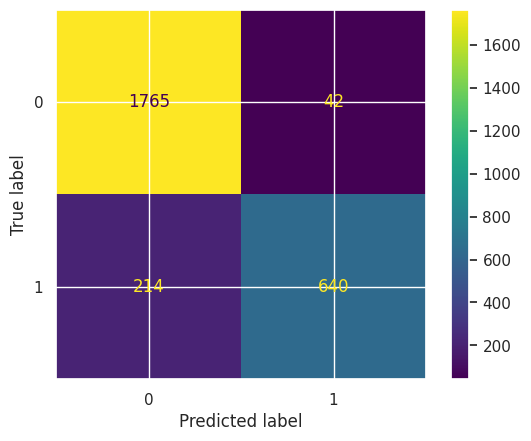

In [ ]:
cm = confusion_matrix(y_test_pred_prob_rf.True_Class, y_test_pred_prob_rf.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### 🤖 XGBoost

In [ ]:
# Instantiate the XGBoost classifier model
xgboost_model = XGBClassifier(random_state=76)

# Define the hyperparameter grid for random search
hyperparameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4]
}

# Initialize the RandomizedSearchCV with the defined hyperparameters
search_optimizer = RandomizedSearchCV(estimator=xgboost_model, param_distributions=hyperparameters, n_iter=50, scoring='f1', cv=5, verbose=1, random_state=76)

# Fit the model to the oversampled training data
search_optimizer.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gam

In [ ]:
# Output the best F1 score obtained during the search
best_score = round(search_optimizer.best_score_, 2)
print(f"Optimal F1 score: {best_score}")

# Display the hyperparameters that led to the best score
best_parameters = search_optimizer.best_params_
print("Optimal hyperparameters: ", best_parameters)

# Retrieve the best model based on the search results
optimized_model = search_optimizer.best_estimator_


Optimal F1 score: 0.97
Optimal hyperparameters:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1788888888888889, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
# Set final threshold here
final_prediction_threshold = 0.5
# Predict
y_pred = optimized_model.predict_proba(X_test_final)

# Saving prediction in a dataframe
y_test_pred_prob_xgb = pd.DataFrame(y_pred,columns=["0","1"])

# Providing threshold as 0.5
y_test_pred_prob_xgb["Prediction"] = y_test_pred_prob_xgb["1"] > final_prediction_threshold
y_test_pred_prob_xgb["Prediction"] = y_test_pred_prob_xgb["Prediction"].astype(int)
y_test_pred_prob_xgb["True_Class"] = y_test_final

In [ ]:
print(classification_report(y_true = y_test_pred_prob_xgb.True_Class, y_pred = y_test_pred_prob_xgb.Prediction))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1807
           1       0.92      0.76      0.83       854

    accuracy                           0.90      2661
   macro avg       0.91      0.86      0.88      2661
weighted avg       0.90      0.90      0.90      2661



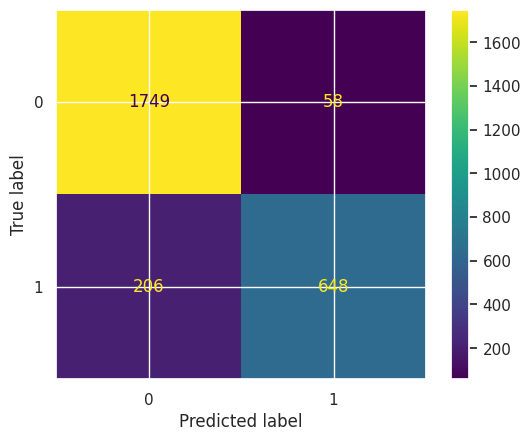

In [ ]:
cm = confusion_matrix(y_test_pred_prob_xgb.True_Class, y_test_pred_prob_xgb.Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Compare the result

In [ ]:
# Create a dictionary to store the classification reports for each model.
model_reports = {}

# Calculate and store the classification reports.
model_reports["LGBM"] = classification_report(y_true=y_test_pred_prob_lgbm.True_Class, y_pred=y_test_pred_prob_lgbm.Prediction, output_dict=True)
model_reports["RandomForest"] = classification_report(y_true=y_test_pred_prob_rf.True_Class, y_pred=y_test_pred_prob_rf.Prediction, output_dict=True)
model_reports["XGBoost"] = classification_report(y_true=y_test_pred_prob_xgb.True_Class, y_pred=y_test_pred_prob_xgb.Prediction, output_dict=True)


# Convert classification reports to dataframes for easier comparison.
report_dfs = {}
for model_name, report in model_reports.items():
    report_dfs[model_name] = pd.DataFrame(report).transpose()

# Display the classification reports side by side.
display(pd.concat(report_dfs, axis=1, keys=report_dfs.keys()))

LGBM                         RandomForest                  \
             precision recall f1-score support    precision recall f1-score   
0                 0.90   0.97     0.93 1807.00         0.89   0.98     0.93   
1                 0.93   0.76     0.84  854.00         0.94   0.75     0.83   
accuracy          0.90   0.90     0.90    0.90         0.90   0.90     0.90   
macro avg         0.91   0.87     0.88 2661.00         0.92   0.86     0.88   
weighted avg      0.91   0.90     0.90 2661.00         0.91   0.90     0.90   

                       XGBoost                          
             support precision recall f1-score support  
0            1807.00      0.89   0.97     0.93 1807.00  
1             854.00      0.92   0.76     0.83  854.00  
accuracy        0.90      0.90   0.90     0.90    0.90  
macro avg    2661.00      0.91   0.86     0.88 2661.00  
weighted avg 2661.00      0.90   0.90     0.90 2661.00

**Conclusion:**
Given the similar overall performance, **LGBM Classifier** stands out slightly due to its higher precision and balanced recall, making it the most promising model for Bankruptcy Prediction.